<a href="https://colab.research.google.com/github/s-choung/Simulation_tutorials/blob/main/handson_DFT_setup_and_bulk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Density Functional Theory in Catalyst Research

The urgent need to combat climate change has increased the focus on renewable energy sources, aiming to reduce reliance on fossil fuels and mitigate environmental harm. Efficient catalysts are essential for accelerating chemical reactions, lowering energy consumption, and improving production efficiency. Density Functional Theory (DFT) allows for the simulation of electron density around atomic nuclei by approximating the Schrödinger equation. This facilitates the prediction of catalyst properties, including active sites, adsorbate interactions, and electronic structures, driving more efficient and predictive catalyst design.

*Choung et al., Chemical Engineering Journal 494, 2024, 152757*


## The grid-based projector-augmented wave (GPAW) code
GPAW is a density-functional theory (DFT) Python code based on the projector-augmented wave (PAW) method and the atomic simulation environment (ASE).  GPAW is open-source Python package for electronic structure calculations. GPAW is based on the projector-augmented wave method and can solve the self-consistent DFT equations using three different wave-function representations, namely real-space grids, plane waves, and numerical atomic orbitals.
read more: https://pubs.aip.org/aip/jcp/article/160/9/092503/3269902/GPAW-An-open-Python-package-for-electronic

- **`python3-dev`**: Provides header files needed to compile Python extensions for `gpaw`'s high-performance computations.
- **`libopenblas-dev`**: Optimized library for linear algebra operations like matrix multiplication, ensuring efficient performance in `gpaw`.
- **`liblapack-dev`**: Another essential library for linear algebra tasks such as solving equations and eigenvalue problems.
- **`libfftw3-dev`**: Library for Fast Fourier Transform (FFT), used in electronic structure calculations to handle problems in reciprocal space.
- **`libxc-dev`**: Provides exchange-correlation functionals required for Density Functional Theory (DFT) calculations in `gpaw`.


In [1]:
!apt-get update
!apt-get install -y python3-dev libopenblas-dev liblapack-dev libfftw3-dev libxc-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,314 kB]
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:14 https://r2u.stat.illinois.edu

In [2]:
!pip install gpaw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 79.6 MB/s eta 0:00:00
  Created wheel for gpaw: filename=gpaw-24.6.0-cp310-cp310-linux_x86_64.whl size=2787035 sha256=98405a3e5c27a061560c8d90868efe96a7cd0a6b892c3b9fa17f9db220f61edd
  Stored in directory: /root/.cache/pip/wheels/13/03/25/dc7e7191efd7e13c67490ed6c1de03bcc1674874df1dc6e118
Successfully built gpaw


In [3]:
!gpaw test

 -------------------------------------------------------------------------------------------------
| python-3.10.12    /usr/bin/python3                                                              |
| gpaw-24.6.0       /usr/local/lib/python3.10/dist-packages/gpaw/                                 |
| ase-3.23.0        /usr/local/lib/python3.10/dist-packages/ase/                                  |
| numpy-1.26.4      /usr/local/lib/python3.10/dist-packages/numpy/                                |
| scipy-1.13.1      /usr/local/lib/python3.10/dist-packages/scipy/                                |
| libxc-5.1.7       yes                                                                           |
| _gpaw             /usr/local/lib/python3.10/dist-packages/_gpaw.cpython-310-x86_64-linux-gnu.so |
| MPI enabled       yes                                                                           |
| OpenMP enabled    no                                                                            |
|

## Install Pseudo potential for GPAW calculations

A setup is to the PAW method what a pseudo-potential is to the pseudo-potential method.
read more: https://gpaw.readthedocs.io/setups/setups.html

In [ ]:
!tar -xvzf gpaw-setups-24.1.0.tar.gz

In [5]:
!gpaw -T install-data ./

Traceback (most recent call last):
  File "/usr/local/bin/gpaw", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gpaw/cli/main.py", line 78, in main
    ase_main('gpaw', 'GPAW command-line tool', __version__,
  File "/usr/local/lib/python3.10/dist-packages/ase/cli/main.py", line 104, in main
    f(args, parsers[args.command])
  File "/usr/local/lib/python3.10/dist-packages/gpaw/cli/install_data.py", line 90, in run
    main(args, parser)
  File "/usr/local/lib/python3.10/dist-packages/gpaw/cli/install_data.py", line 113, in main
    urls = get_urls(args.source)
  File "/usr/local/lib/python3.10/dist-packages/gpaw/cli/install_data.py", line 252, in get_urls
    response = urlopen_nocertcheck(page)
  File "/usr/local/lib/python3.10/dist-packages/gpaw/cli/install_data.py", line 49, in urlopen_nocertcheck
    return urlopen(src, context=ctx)
  File "/usr/lib/python3.10/urllib/request.py", line 216, in urlopen
    return opener.open(url, data, timeou

In [ ]:
import os
import gzip
import shutil

# Define the path to the setup files
setup_path = '/content/gpaw-setups-24.1.0'

# Uncompress all .gz files in the setup directory
for filename in os.listdir(setup_path):
    if filename.endswith('.gz'):
        filepath = os.path.join(setup_path, filename)
        with gzip.open(filepath, 'rb') as f_in:
            with open(filepath[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

# List the files after uncompressing to ensure the process completed successfully
print("Files in setup directory after uncompressing:", os.listdir(setup_path))

# Set the GPAW_SETUP_PATH environment variable
os.environ['GPAW_SETUP_PATH'] = setup_path

# Verify the environment variable
print("GPAW_SETUP_PATH:", os.environ['GPAW_SETUP_PATH'])



Files in setup directory after uncompressing: ['Cr.LDA', 'Te.16.dzp.basis', 'Zr.RPBE', 'K.GLLBSC.gz', 'V.LDA.gz', 'Re.LDA.gz', 'Sc.dzp.basis.gz', 'Sc.RPBE.gz', 'S.LDA', 'Te.PBE.gz', 'Y.revPBE.gz', 'Ta.revPBE', 'Ir.GLLBSC', 'Ba.revPBE', 'Cr.14.PBE', 'Cs.LDA', 'F.RPBE', 'Be.dzp.basis', 'Nb.5.LDA.gz', 'Pd.RPBE', 'Na.1.RPBE', 'Si.dzp.basis.gz', 'Nb.RPBE.gz', 'Cs.GLLBSC.gz', 'Kr.LDA', 'Mg.2.revPBE.gz', 'Se.dzp.basis.gz', 'Br.PBE.gz', 'Mn.7.PBE.gz', 'As.PBE', 'Pb.PBE.gz', 'Ni.dzp.basis.gz', 'Ta.5.revPBE.gz', 'Hg.dzp.basis', 'As.RPBE', 'Pd.10.dzp.basis.gz', 'Y.GLLBSC', 'He.RPBE', 'V.5.revPBE.gz', 'Hg.LDA.gz', 'Rb.RPBE.gz', 'K.LDA', 'As.LDA.gz', 'Bi.RPBE', 'Al.revPBE.gz', 'Fe.GLLBSC.gz', 'Na.1.GLLBSC.gz', 'Ir.PBE.gz', 'Li.LDA', 'I.LDA', 'Cu.RPBE.gz', 'Tl.dzp.basis.gz', 'Fe.LDA.gz', 'Mo.LDA', 'C.RPBE.gz', 'Ru.8.GLLBSC', 'B.dzp.basis', 'Xe.GLLBSC', 'Hf.dzp.basis', 'H.PBE.gz', 'Re.dzp.basis.gz', 'Sn.GLLBSC', 'Te.PBE', 'Hg.RPBE', 'Pt.dzp.basis', 'P.LDA.gz', 'Si.PBE', 'Ba.LDA.gz', 'Ti.dzp.basis', '


## Atomic Simulation Environment (ASE)
GPAW is well integrated with the Atomic Simulation Environment (ASE), providing a flexible and dynamic user interface

In [ ]:
!pip install ase

In [ ]:
# Import ASE and GPAW and run your calculation
from ase import Atoms
from gpaw import GPAW

# Define the atomic structure
d = 0.74
a = 6.0

h2 = Atoms('H2',
              positions=[(0, 0, 0),
                         (0, 0, d)],
              cell=(a, a, a))
h2.center()
# Initialize GPAW calculator without specifying the 'setups' parameter
calc = GPAW(mode='fd', nbands=2, txt='h2.txt')
h2.calc = calc

# Run the calculation
print("Forces on atoms:", h2.get_forces())
print("Energies on atoms:", h2.get_total_energy())


Forces on atoms: [[ 0.          0.         -0.84512566]
 [ 0.          0.          0.84512566]]
Energies on atoms: -6.627349275456466


## Install POVRAY: visualization of atoms

The Persistence of Vision Ray Tracer, most commonly acronymed as POV-Ray, is a cross-platform ray-tracing program that generates images from a text-based scene description.

In [ ]:
!sudo apt-get install povray  ## visulization program

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-povray libsdl1.2debian povray-includes
Suggested packages:
  povray-doc povray-examples
The following NEW packages will be installed:
  fonts-povray libsdl1.2debian povray povray-includes
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,792 kB of archives.
After this operation, 5,199 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-povray all 1:3.7.0.10-1 [70.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libsdl1.2debian amd64 1.2.15+dfsg2-6 [177 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 povray amd64 1:3.7.0.10-1 [1,312 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 povray-includes all 1:3.7.0.10-1 [233 kB]
Fetched 1,792 kB in 0s (4,761 kB/s)
debconf: unable to initialize frontend: Dialo

In [ ]:
import os
import shutil
from ase.io import write  # Import the write function from ASE
from PIL import Image
from IPython.display import display  # Import display for Jupyter Notebooks


def visual(structure, max_size=(200, 200), stretch_y=1.0, rotation='15z,-60x', png_save_path='./'):
    renderer = write('./temp.pov', structure, rotation=rotation)
    renderer.render()
    image_path = './temp.png'
    img = Image.open(image_path)

    # Calculate new size with stretch factor
    new_size = (max_size[0], int(max_size[1] * stretch_y))
    img = img.resize(new_size, Image.LANCZOS)
    display(img)

    # Move files to output directory
    files = ['./temp.ini', './temp.pov', './temp.png']
    destination = './output/'

    # Ensure destination directory exists
    os.makedirs(destination, exist_ok=True)

    for file in files:
        # Remove the file in the destination directory if it exists
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))

        if file == './temp.png':
            new_file_name = png_save_path + f'temp.png'
        else:
            new_file_name = os.path.basename(file)
        shutil.move(file, os.path.join(destination, new_file_name))


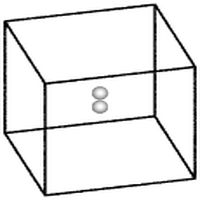

In [ ]:
visual(h2)

## Bulk Calculations

In [ ]:
"""Bulk Al(fcc) test"""
from ase import Atoms
from ase.visualize import view
from gpaw import GPAW, PW

name = 'Al-fcc'
a = 4.05  # fcc lattice parameter
b = a / 2
bulk = Atoms('Al',
             cell=[[0, b, b],
                   [b, 0, b],
                   [b, b, 0]],
             pbc=True)

k = 4
calc = GPAW(mode=PW(300),       # cutoff
            kpts=(k, k, k),     # k-points
            txt=name + '.txt')  # output file

bulk.calc = calc

energy = bulk.get_potential_energy()
calc.write(name + '.gpw')
print('Energy:', energy, 'eV')

Energy: -4.122151616078063 eV


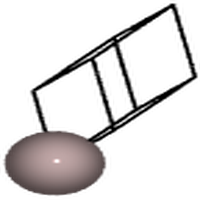

In [ ]:
visual(bulk)

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ase import Atoms
from gpaw import GPAW, PW

# Testing k-points
k_values = [2, 4, 6, 8, 10]  # Different k-point grids to test
energies_k = []
times_k = []

a = 4.05  # fcc lattice parameter
b = a / 2

# Loop over different k-points
for k in k_values:
    # Define the bulk FCC structure
    bulk = Atoms('Al',
                 cell=[[0, b, b],
                       [b, 0, b],
                       [b, b, 0]],
                 pbc=True)

    # Set up the GPAW calculator
    calc = GPAW(mode=PW(300),  # Fixed cutoff energy
                kpts=(k, k, k),  # Varying k-points
                txt=f'Al-fcc-k{k}.txt')

    # Attach the calculator to the bulk structure
    bulk.calc = calc

    # Start timing
    start_time = time.time()

    # Calculate the potential energy
    energy = bulk.get_potential_energy()

    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Store the energy and time
    energies_k.append(energy)
    times_k.append(elapsed_time)

    # Save the calculator state
    calc.write(f'Al-fcc-k{k}.gpw')
    del bulk.calc  # Clean up

# Plot k-points vs. energy
plt.figure()
plt.plot(k_values, energies_k, marker='o', linestyle='-')
plt.xlabel('K-points')
plt.ylabel('Energy (eV)')
plt.title('Energy vs. K-points')
plt.grid()
plt.show()

# Create a DataFrame for the time taken for different k-points
time_k_table = pd.DataFrame({'K-points': k_values, 'Time (s)': times_k})
print(time_k_table)

# Testing plane-wave cutoff energies
pw_values = np.linspace(200, 600, 5)  # Different PW values to test
energies_pw = []
times_pw = []

# Loop over different PW cutoff energies
for pw in pw_values:
    # Define the bulk FCC structure
    bulk = Atoms('Al',
                 cell=[[0, b, b],
                       [b, 0, b],
                       [b, b, 0]],
                 pbc=True)

    # Set up the GPAW calculator
    calc = GPAW(mode=PW(pw),  # Varying cutoff energy
                kpts=(4, 4, 4),  # Fixed k-points
                txt=f'Al-fcc-pw{pw:.0f}.txt')

    # Attach the calculator to the bulk structure
    bulk.calc = calc

    # Start timing
    start_time = time.time()

    # Calculate the potential energy
    energy = bulk.get_potential_energy()

    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Store the energy and time
    energies_pw.append(energy)
    times_pw.append(elapsed_time)

    # Save the calculator state
    calc.write(f'Al-fcc-pw{pw:.0f}.gpw')
    del bulk.calc  # Clean up

# Plot PW values vs. energy
plt.figure()
plt.plot(pw_values, energies_pw, marker='o', linestyle='-')
plt.xlabel('PW Cutoff (eV)')
plt.ylabel('Energy (eV)')
plt.title('Energy vs. PW Cutoff')
plt.grid()
plt.show()

# Create a DataFrame for the time taken for different PW values
time_pw_table = pd.DataFrame({'PW Cutoff (eV)': pw_values, 'Time (s)': times_pw})
print(time_pw_table)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms
from gpaw import GPAW, PW

# Set up values for lattice parameter 'a'
a_values = np.linspace(3.8, 4.2, 10)  # Adjust the range and number of points as needed
energies = []
volumes = []

# Loop over each lattice parameter to calculate energy
for a in a_values:
    b = a / 2
    # Define the bulk structure
    bulk = Atoms('Al',
                 cell=[[0, b, b],
                       [b, 0, b],
                       [b, b, 0]],
                 pbc=True)

    # Set up the calculator
    k = 4
    calc = GPAW(mode=PW(300),       # Plane-wave cutoff
                kpts=(k, k, k),     # k-points grid
                txt=f'Al-fcc-a{a:.2f}.txt')  # Output file with varying name

    # Attach the calculator to the bulk structure
    bulk.calc = calc

    # Calculate the potential energy
    energy = bulk.get_potential_energy()
    volume = bulk.get_volume()

    # Store the energy and volume
    energies.append(energy)
    volumes.append(volume)

    # Clean up the calculator
    calc.write(f'Al-fcc-a{a:.2f}.gpw')
    del bulk.calc  # Free memory

# Plot EOS: Energy vs. Volume
plt.figure()
plt.plot(volumes, energies, marker='o', linestyle='-')
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Equation of State for Al (FCC)')
plt.grid()
plt.show()


slab

In [ ]:
import os
import shutil
from ase.io import write  # Import the write function from ASE
from PIL import Image
from IPython.display import display  # Import display for Jupyter Notebooks


def visual(structure, max_size=(100, 100), stretch_y=1.0, rotation='15z,-90x', png_save_path='./'):
    renderer = write('./temp.pov', structure, rotation=rotation)
    renderer.render()
    image_path = './temp.png'

    # Calculate new size with stretch factor
    new_size = (max_size[0], int(max_size[1] * stretch_y))
    img = img.resize(new_size, Image.LANCZOS)
    display(img)
    # Move files to output directory
    files = ['./temp.ini', './temp.pov', './temp.png']
    destination = './output/'

    # Ensure destination directory exists
    os.makedirs(destination, exist_ok=True)

    for file in files:
        # Remove the file in the destination directory if it exists
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))

        if file == './temp.png':
            new_file_name = png_save_path + f'temp.png'
        else:
            new_file_name = os.path.basename(file)
        shutil.move(file, os.path.join(destination, new_file_name))


In [ ]:
visual(bulk,(300,300))
repeat=(4,4,4)
visual(bulk*repeat,(300,300))

In [ ]:
import time  # Import the time module
from ase.build import fcc100
from gpaw import GPAW

# Initialize the parameters
k = 1
N = 4
size = 2
# Create the slab
fcc = fcc100('Al', (size, size, N), a=4, vacuum=7.5)
fcc.center(axis=2)

# Set up the GPAW calculator
calc = GPAW(mode='fd',
            nbands=N * 3 * size**2,
            kpts=(k, k, 1),
            h=0.25,
            txt='slab-%d.txt' % N)

# Attach the calculator to the slab
fcc.calc = calc

# Start timing
start_time = time.time()

# Run the calculation to get the potential energy
e = fcc.get_potential_energy()

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Save the calculator state
calc.write('slab-%d.gpw' % N)

# Print the energy and the elapsed time
print(f'Potential Energy: {e} eV')
print(f'Time taken: {elapsed_time:.2f} seconds')
